In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import json

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

from keras.applications import inception_v3
from keras.layers import GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model
#import tensorflow as tf
#from tensorflow.math import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, UpSampling2D, Reshape, BatchNormalization
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
img_dir = '/home/ubuntu/Images'

In [3]:
import zipfile
with zipfile.ZipFile("Images.zip","r") as Images:
    Images.extractall('/home/ubuntu')

In [4]:
batches = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    img_dir,
                    target_size=(224, 224),
                    batch_size=20580)

Found 20580 images belonging to 120 classes.


In [5]:
data, labels = next(batches)

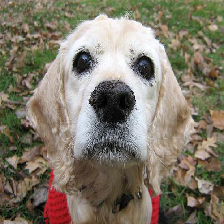

In [6]:
array_to_img(data[5])

In [7]:
X_model, X_test, y_model, y_test = train_test_split(data, labels, test_size=0.20, random_state=123)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [10]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model2 = models.Sequential()
new_model2.add(imagenet)
new_model2.add(GlobalAveragePooling2D())
new_model2.add(Dense(1024,activation='relu'))
new_model2.add(Dense(1024,activation='relu')) #dense layer 2
new_model2.add(Dense(512,activation='relu')) #dense layer 3
new_model2.add(Dense(120,activation='sigmoid')) #final layer with softmax activation

### Inception model. Batch size = 50

In [11]:
new_model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_modeL_32 = new_model2.fit(X_train,
          y_train,
          epochs=6,
          batch_size=50,
          validation_data=(X_val, y_val))

Train on 13171 samples, validate on 3293 samples
Epoch 1/6
13171/13171 [==============================] - 322s 24ms/step - loss: 4.7297 - accuracy: 0.0511 - val_loss: 4.6043 - val_accuracy: 0.1403
Epoch 2/6
13171/13171 [==============================] - 270s 21ms/step - loss: 4.4106 - accuracy: 0.2516 - val_loss: 3.6771 - val_accuracy: 0.4525
Epoch 3/6
13171/13171 [==============================] - 271s 21ms/step - loss: 2.2192 - accuracy: 0.5424 - val_loss: 1.5954 - val_accuracy: 0.5424
Epoch 4/6
13171/13171 [==============================] - 271s 21ms/step - loss: 0.9186 - accuracy: 0.7357 - val_loss: 1.2562 - val_accuracy: 0.6350
Epoch 5/6
13171/13171 [==============================] - 271s 21ms/step - loss: 0.5051 - accuracy: 0.8482 - val_loss: 1.1000 - val_accuracy: 0.6805
Epoch 6/6
13171/13171 [==============================] - 271s 21ms/step - loss: 0.3070 - accuracy: 0.9106 - val_loss: 0.8821 - val_accuracy: 0.7464


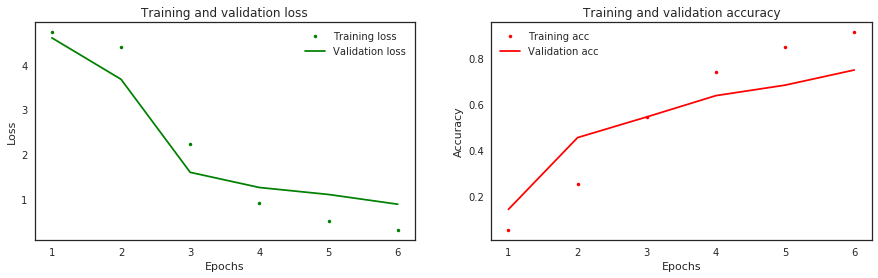

In [15]:
hist_cnn = new_modeL_32.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
results_train2 = new_model2.evaluate(X_train, y_train)
results_test2 = new_model2.evaluate(X_test, y_test)
print(results_train2, results_test2)

4116/4116 [==============================] - 23s 6ms/step
[0.17125362941628844, 0.9487510323524475] [0.9243254757715268, 0.7444120645523071]


In [50]:
loss_and_metrics = new_model2.evaluate(X_test, y_test, batch_size=50)

4116/4116 [==============================] - 22s 5ms/step


In [51]:
loss_and_metrics

[0.9271137211308883, 0.7444120645523071]

In [65]:
predictions_inc2.shape

(4116, 120)

In [70]:
f1_score(y_test, predictions_inc2, average='micro')

0.2785905625386359

In [52]:
predictions_inc2 = new_model2.predict(X_test)
predictions_inc2 = np.around(predictions_inc2)

In [79]:
pd.DataFrame(data=[metrics.accuracy_score(y_test, predictions_inc2), metrics.recall_score(y_test, predictions_inc2, average='micro'),
                   metrics.precision_score(y_test, predictions_inc2, average='micro'), metrics.f1_score(y_test, predictions_inc2, average='micro')], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.162536
recall,0.164237
precision,0.917232
F1,0.278591


In [ ]:
confusion = tf.confusion_matrix(labels=y_, predictions=y, num_classes=num_classes)

### Inception model. Batch size = 32

In [9]:
new_model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_modeL_32 = new_model2.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_val, y_val))

Train on 13171 samples, validate on 3293 samples
Epoch 1/10
13171/13171 [==============================] - 332s 25ms/step - loss: 4.6782 - accuracy: 0.0906 - val_loss: 4.4064 - val_accuracy: 0.2369
Epoch 2/10
13171/13171 [==============================] - 281s 21ms/step - loss: 3.0080 - accuracy: 0.4118 - val_loss: 1.3978 - val_accuracy: 0.6162
Epoch 3/10
13171/13171 [==============================] - 281s 21ms/step - loss: 1.0646 - accuracy: 0.6930 - val_loss: 1.0588 - val_accuracy: 0.6714
Epoch 4/10
13171/13171 [==============================] - 282s 21ms/step - loss: 0.5868 - accuracy: 0.8138 - val_loss: 0.9974 - val_accuracy: 0.7088
Epoch 5/10
13171/13171 [==============================] - 281s 21ms/step - loss: 0.3402 - accuracy: 0.8927 - val_loss: 0.9647 - val_accuracy: 0.7322
Epoch 6/10
13171/13171 [==============================] - 281s 21ms/step - loss: 0.2174 - accuracy: 0.9302 - val_loss: 1.0221 - val_accuracy: 0.7394
Epoch 7/10
13171/13171 [==============================] -

In [12]:
#model.save("inseption_10e_bat32_76accu")

In [81]:
from keras.models import load_model

# load model
model_76 = load_model('inseption_10e_bat32_76accu')


In [85]:
#model_76
results_train = model_76.evaluate(X_train, y_train)
results_test = model_76.evaluate(X_test, y_test)
print(results_train, results_test)

4116/4116 [==============================] - 22s 5ms/step
[0.01545654595709516, 0.9962037801742554] [1.0593784033846694, 0.7650631666183472]


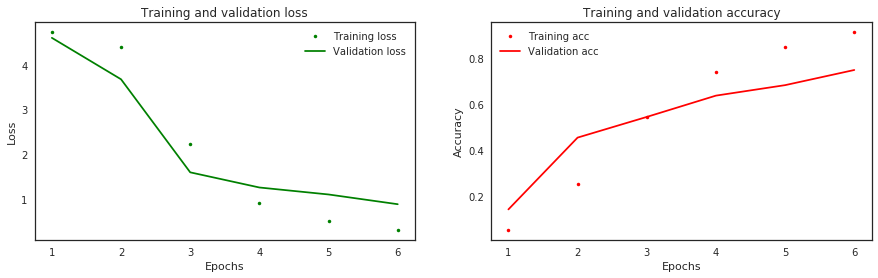

In [88]:
hist_cnn = new_modeL_32.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [89]:
predictions_inc_76 = model_76.predict(X_test)
predictions_inc_76 = np.around(predictions_inc_76)

In [90]:
pd.DataFrame(data=[metrics.accuracy_score(y_test, predictions_inc_76), metrics.recall_score(y_test, predictions_inc_76, average='micro'),
                   metrics.precision_score(y_test, predictions_inc_76, average='micro'), metrics.f1_score(y_test, predictions_inc_76, average='micro')], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.176142
recall,0.176628
precision,0.940492
F1,0.297402


### Inception model. Batch size = 64

In [15]:
new_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
new_model1 = new_model.fit(X_train,
                          y_train,
                          epochs=10,
                          batch_size=64,
                          validation_data=(X_val, y_val))

Train on 13171 samples, validate on 3293 samples
Epoch 1/10
13171/13171 [==============================] - 313s 24ms/step - loss: 0.0174 - accuracy: 0.9957 - val_loss: 0.8409 - val_accuracy: 0.7892
Epoch 2/10
13171/13171 [==============================] - 269s 20ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.8367 - val_accuracy: 0.7935
Epoch 3/10
13171/13171 [==============================] - 270s 20ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.8428 - val_accuracy: 0.7941
Epoch 4/10
13171/13171 [==============================] - 270s 20ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.8421 - val_accuracy: 0.7965
Epoch 5/10
13171/13171 [==============================] - 269s 20ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.8513 - val_accuracy: 0.7978
Epoch 6/10
13171/13171 [==============================] - 269s 20ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.8758 - val_accuracy: 0.7974
Epoch 7/10
13171/13171 [==============================] -

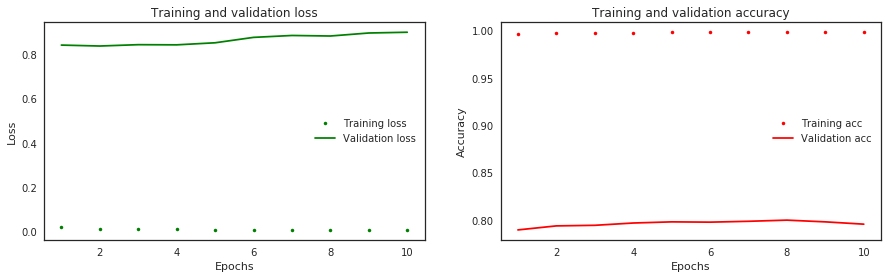

In [16]:
hist_cnn = new_model1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
#new_model.save("inseption_10e_bat64_79accu")

In [19]:
results_train_79 = new_model.evaluate(X_train, y_train)
results_test_79 = new_model.evaluate(X_test, y_test)
print(results_train_79, results_test_79)

4116/4116 [==============================] - 23s 5ms/step
[0.003228046716208623, 0.9984815120697021] [0.9801112815404657, 0.794946551322937]


In [87]:
predictions_inc_79 = new_model.predict(X_test)
predictions_inc_79 = np.around(predictions_inc_79)

NameError: name 'new_model' is not defined

In [76]:
from sklearn import metrics

In [78]:
pd.DataFrame(data=[metrics.accuracy_score(y_test, predictions_inc), metrics.recall_score(y_test, predictions_inc, average='micro'),
                   metrics.precision_score(y_test, predictions_inc, average='micro'), metrics.f1_score(y_test, predictions_inc, average='micro')], 
             index=["accuracy", "recall", "precision", "F1"])

NameError: name 'predictions_inc' is not defined

In [75]:
f1_score(y_test, predictions_inc, average='micro')

NameError: name 'predictions_inc' is not defined

In [ ]:
plot_confusion_matrix(y_test, predictions_inc)

Confusion matrix, without normalization
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


In [1]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

NameError: name 'plt' is not defined

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=['Cat', 'Dog', 'Rabbit'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cat', 'Dog', 'Rabbit'],
                      title='Confusion matrix, without normalization')

### Resnet50 model

In [9]:
from keras.applications import ResNet50

In [10]:
resnet=ResNet50(weights='imagenet',include_top=False)
resnet_new=resnet.output
res_model = models.Sequential()
res_model.add(resnet)
res_model.add(GlobalAveragePooling2D())
res_model.add(Dense(1024,activation='relu'))
res_model.add(Dense(1024,activation='relu')) #dense layer 2
res_model.add(Dense(512,activation='relu')) #dense layer 3
res_model.add(Dense(120,activation='sigmoid')) #final layer with softmax activation

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [14]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [93]:
#keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
res_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
res_model1 = res_model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_val, y_val))

Train on 13171 samples, validate on 3293 samples
Epoch 1/10
13171/13171 [==============================] - 520s 39ms/step - loss: 4.5057 - accuracy: 0.0749 - val_loss: 5.0019 - val_accuracy: 0.0052
Epoch 2/10
13171/13171 [==============================] - 489s 37ms/step - loss: 2.1369 - accuracy: 0.4173 - val_loss: 2.9416 - val_accuracy: 0.2621
Epoch 3/10
13171/13171 [==============================] - 489s 37ms/step - loss: 1.0365 - accuracy: 0.6786 - val_loss: 1.4938 - val_accuracy: 0.5597
Epoch 4/10
13171/13171 [==============================] - 489s 37ms/step - loss: 0.5670 - accuracy: 0.8163 - val_loss: 1.3261 - val_accuracy: 0.6234
Epoch 5/10
13171/13171 [==============================] - 490s 37ms/step - loss: 0.3058 - accuracy: 0.9040 - val_loss: 1.2755 - val_accuracy: 0.6663
Epoch 6/10
13171/13171 [==============================] - 490s 37ms/step - loss: 0.1678 - accuracy: 0.9530 - val_loss: 1.1992 - val_accuracy: 0.6784
Epoch 7/10
13171/13171 [==============================] -

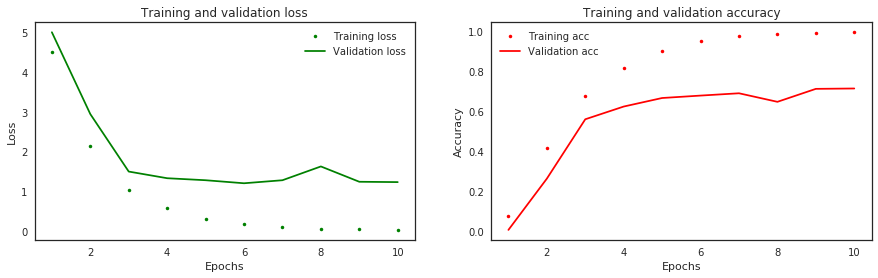

In [94]:
hist_cnn = res_model1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
res_model.save("resnet_10e_bat32")

In [96]:
results_train_res = res_model.evaluate(X_train, y_train)
results_test_res = res_model.evaluate(X_test, y_test)
print(results_train_res, results_test_res)

4116/4116 [==============================] - 40s 10ms/step
[0.009709217250881705, 0.9980259537696838] [1.219751124073859, 0.7269193530082703]


In [97]:
predictions_res = res_model.predict(X_test)
predictions_res = np.around(predictions_res)

In [98]:
f1_score(y_test, predictions_res, average='micro')

0.08358486185279776

In [108]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
labels.shape

In [ ]:
#cnf_matrix = confusion_matrix(y_test, predictions_res, labels=[labels])
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions_res, axis=1))

#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[22  0  0 ...  0  0  0]
 [36  3  0 ...  0  0  0]
 [49  0  3 ...  0  0  0]
 ...
 [31  0  0 ...  2  0  0]
 [28  0  0 ...  0  3  0]
 [24  0  0 ...  0  0  4]]


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [23]:
#keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
res_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# step_size_train=train_generator.n//train_generator.batch_size
res_model1 = res_model.fit(X_train,
          y_train,
          epochs=7,
          batch_size=32,
          validation_data=(X_val, y_val))

NameError: name 'res_model' is not defined

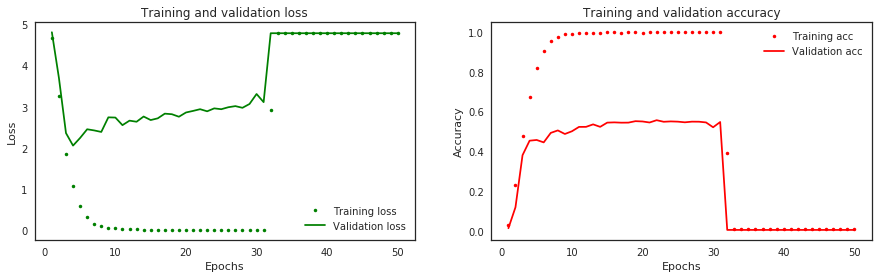

In [12]:
hist_cnn = res_model1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
results_train = res_model.evaluate(X_train, y_train)
results_test = res_model.evaluate(X_test, y_test)
print(results_train, results_test)

4116/4116 [==============================] - 14s 4ms/step
[4.787491798400879, 0.00850353017449379] [4.787491798400879, 0.0053449952974915504]


In [14]:
predictions_res = res_model.predict(X_test)
predictions_res = np.around(predictions_res)

In [15]:
f1_score(y_test, predictions_res, average='micro')

0.01652892561983471